# 机器学习

In [46]:
%matplotlib inline

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

import sklearn
print sklearn.__version__

0.17.1


## boston data

In [47]:
# boston data
boston = datasets.load_boston()
y = boston.target
X = boston.data

In [48]:
' '.join(dir(boston))

'__class__ __cmp__ __contains__ __delattr__ __delitem__ __dict__ __doc__ __eq__ __format__ __ge__ __getattr__ __getattribute__ __getitem__ __gt__ __hash__ __init__ __iter__ __le__ __len__ __lt__ __module__ __ne__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __setitem__ __setstate__ __sizeof__ __str__ __subclasshook__ __weakref__ clear copy fromkeys get has_key items iteritems iterkeys itervalues keys pop popitem setdefault update values viewitems viewkeys viewvalues'

In [49]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [50]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf            #OLS模型  y=beta x + C  

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('boston.target ~ boston.data', data=boston).fit()

print results.summary()

                            OLS Regression Results                            
Dep. Variable:          boston.target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 15 May 2016   Prob (F-statistic):          6.95e-135
Time:                        18:52:09   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          36.4911      5.104     

In [51]:
regr = linear_model.LinearRegression()
lm = regr.fit(boston.data, y)

In [52]:
lm.intercept_, lm.coef_, lm.score(boston.data, y)   # intercept=C ; coef=Beta

(36.491103280361237,
 array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
          2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
          7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
         -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
         -5.25466633e-01]),
 0.74060774286494269)

In [53]:
predicted = regr.predict(boston.data)

In [60]:
[y.min(), y.max()]

[5.0, 50.0]

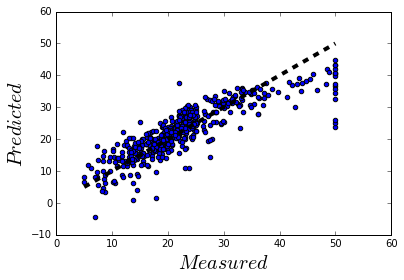

In [54]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #'k--'线的类型，lw=4 线的宽度
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

# 训练集和测试集

In [39]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [40]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

In [55]:
regr = linear_model.LinearRegression()
lm = regr.fit(Xs_train, y_train)

In [56]:
lm.intercept_, lm.coef_, lm.score(Xs_train, y_train)

(30.288948339368815,
 array([ -1.12463481e-01,   3.00810168e-02,   4.07309919e-02,
          2.78676719e+00,  -1.72406347e+01,   4.43248784e+00,
         -6.23998173e-03,  -1.44848504e+00,   2.62113793e-01,
         -1.06390978e-02,  -9.16398679e-01,   1.24516469e-02,
         -5.09349120e-01]),
 0.75088377867329137)

In [43]:
predicted = regr.predict(Xs_test)

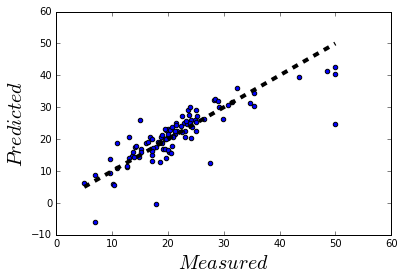

In [44]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

# 交叉检验

In [20]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, boston.data , boston.target, cv = 3)     #拟合次数3
scores.mean()  

-1.5787701857181775

In [22]:
data_X_scale = scale(boston.data)    #对数据进行标准化
scores = cross_val_score(regr, boston.data, boston.target, cv = 7)
scores.mean()  

0.45384871359695766

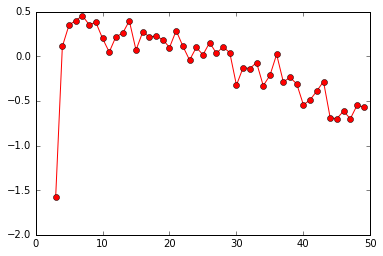

In [23]:
scores = [cross_val_score(regr, data_X_scale, boston.target, cv = int(i)).mean() for i in range(3, 50)]
plt.plot(range(3, 50), scores,'r-o')
plt.show()

# 使用天涯bbs数据

In [15]:
import pandas as pd

df = pd.read_csv('D:/program/cjc2016/homework/techwindge/homework2/tianya_bbs_threads_list.txt', sep = "\t", header=None)
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:10]

,title,link,author,author_page,click,reply,time
0,"211大学电子商务本科生,望大神支招",/post-university-703854-1.shtml,u_110633156,http://www.tianya.cn/110633156,70,9,2016-05-12 12:02
1,"211毕业两年,还是小白..",/post-university-703813-1.shtml,小熙说,http://www.tianya.cn/111964690,18,0,2016-05-12 09:51
2,大学一定要一本/985/211吗,/post-university-701339-1.shtml,wenzhangjia,http://www.tianya.cn/111729997,251,12,2016-04-27 16:20
3,"211""985名牌大学网络教育报名",/post-university-700314-1.shtml,张老师6,http://www.tianya.cn/101812799,20,0,2016-04-21 15:03
4,"考研调剂要看出身非985,211成硬伤(转载)",/post-university-697665-1.shtml,krystal143,http://www.tianya.cn/108532431,70,0,2016-04-07 09:37
5,一个西部小名气211大学生的日常生活,/post-university-695723-1.shtml,一连城,http://www.tianya.cn/107387578,34,0,2016-03-26 20:49
6,摄影211高考教育培训学校怎么样?(转载),/post-university-693776-1.shtml,1571392224,http://www.tianya.cn/106958567,13,1,2016-03-16 23:36
7,"2016年度中国办学水平最低的30所""211工程""大学",/post-university-691947-1.shtml,异度荒原狼,http://www.tianya.cn/108058885,464,7,2016-03-05 22:12
8,211大学分档分析(转载),/post-university-690382-1.shtml,冇名字不重复,http://www.tianya.cn/109402656,263,1,2016-02-25 20:14
9,"心理学考研985,211院校分析(转载)",/post-university-690137-1.shtml,樱花雪飞1203,http://www.tianya.cn/109371028,125,1,2016-02-23 20:32


In [16]:
from sklearn.cross_validation import train_test_split
data_X= [[df.click[i]] for i in range(len(df))]
data_Y= [[df.reply[i]] for i in range(len(df))]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=20)

regr = linear_model.LinearRegression()
regr.fit(data_X_train, data_y_train)
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)

Variance score: 0.08


In [17]:
def randomSplit(dataX, dataY, num):           #自己定义了一个区分训练集和测试集的分类函数
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append([dataX[k]])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append([dataX[k]])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test

In [18]:
import numpy as np

# Use only one feature
data_X = df.reply
# Split the data into training/testing sets    取log
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(np.log(df.click+1), np.log(df.reply+1), 20)
# Create linear regression object             #线性回归
regr = linear_model.LinearRegression()      
# Train the model using the training sets
regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)

Variance score: 0.66


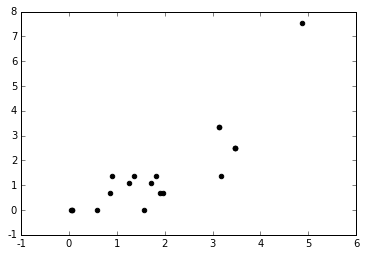

In [19]:
y_true, y_pred = data_y_test, regr.predict(data_X_test)
plt.scatter(y_pred, y_true,  color='black')
plt.show()

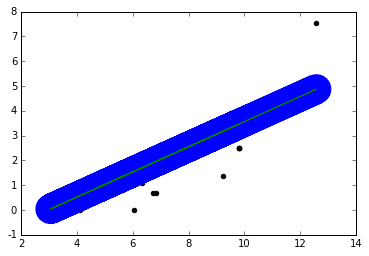

In [20]:
# Plot outputs
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue', linewidth=30)
plt.plot(data_X_test, y_pred, color='green', linewidth=1)
plt.show()

In [21]:
# The coefficients         系数Beta
print 'Coefficients: \n', regr.coef_   

Coefficients: 
[ 0.50684557]


In [22]:
# The mean square error      方差平均   拟合程度，数字越大，拟合越高
print "Residual sum of squares: %.2f" % np.mean((regr.predict(data_X_test) - data_y_test) ** 2)

Residual sum of squares: 1.00


## 取数据的log

In [23]:
df.click_log = [[df.click[i]] for i in range(len(df))]
df.reply_log = [[df.reply[i]] for i in range(len(df))]

In [24]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(df.click_log, df.reply_log,test_size=0.2, random_state=0)
#test_size 样本占比。如果是整数的话就是样本的数量。
#random_state是随机数的种子。不同的种子会造成不同的随机采样结果。相同的种子采样结果相同。

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xs_train, y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % regr.score(Xs_test, y_test)

Variance score: 0.07


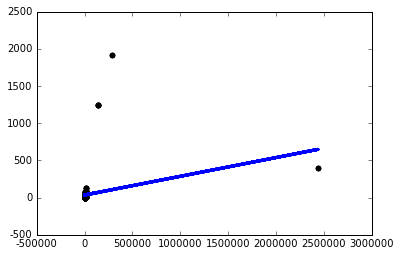

In [25]:
# Plot outputs
plt.scatter(Xs_test, y_test,  color='black')
plt.plot(Xs_test, regr.predict(Xs_test), color='blue', linewidth=3)
plt.show()

In [26]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 3)
scores.mean()  

0.021246773917434385

In [27]:
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 4)
scores.mean() 

0.04241546143923744

## 逻辑回归

In [28]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [29]:
data_X = [[df.click[i], df.reply[i]] for i in range(len(df))]
data_X[:3]

[[70, 9], [18, 0], [251, 12]]

In [30]:
from sklearn.linear_model import LogisticRegression
df['repost'] = repost
model = LogisticRegression()
model.fit(data_X,df.repost)
model.score(data_X,df.repost)

0.83001328021248344

In [31]:
# Split the data into training/testing sets
from sklearn.cross_validation import train_test_split

data_Y= [[df.repost[i]] for i in range(len(df))]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X,data_Y,test_size=20, random_state=20)

# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(data_X_test, data_y_test)

Variance score: 0.85


D:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
data_y_test

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1]]

In [33]:
data_y_test1= [i[0] for i in data_y_test]
data_y_test1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

In [34]:
y_true, y_pred = data_y_test1, log_regr.predict(data_X_test)

In [35]:
y_true, y_pred

([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [36]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92        17
          1       0.00      0.00      0.00         3

avg / total       0.72      0.85      0.78        20



D:\Program Files\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(data_X, df.repost, test_size=0.2, random_state=42)

In [38]:
# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(Xs_train, y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(Xs_test, y_test)

Variance score: 0.85


In [39]:
print('Logistic score for test set: %f' % log_regr.score(Xs_test, y_test))
print('Logistic score for training set: %f' % log_regr.score(Xs_train, y_train))
y_true, y_pred = y_test, log_regr.predict(Xs_test)
print(classification_report(y_true, y_pred))

Logistic score for test set: 0.854063
Logistic score for training set: 0.823993
             precision    recall  f1-score   support

          0       0.85      1.00      0.92       505
          1       1.00      0.10      0.19        98

avg / total       0.88      0.85      0.80       603



In [40]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X, df.repost, cv = 3)
scores.mean()  

0.83001328021248344

In [41]:
logre = LogisticRegression()
data_X_scale = scale(data_X)   #对数据进行标准化
# The importance of preprocessing in data science and the machine learning pipeline I: 
scores = cross_val_score(logre, data_X_scale, df.repost, cv = 3)
scores.mean()  

0.81972111553784865

# 贝叶斯分类

In [42]:
from sklearn import naive_bayes
'  '.join(dir(naive_bayes))

'ABCMeta  BaseDiscreteNB  BaseEstimator  BaseNB  BernoulliNB  ClassifierMixin  GaussianNB  LabelBinarizer  MultinomialNB  __all__  __builtins__  __doc__  __file__  __name__  __package__  _check_partial_fit_first_call  abstractmethod  binarize  check_X_y  check_array  check_is_fitted  in1d  issparse  label_binarize  logsumexp  np  safe_sparse_dot  six'

In [43]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [44]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(x[:8], Y[:8])

#Predict Output 
predicted= model.predict([[1,2],[3,4]])   #拿第九个和第十个预测
print predicted

[4 3]


In [45]:
model.score(x[8:], Y[8:])

0.25

# 交叉检验

In [46]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(df.click, df.reply, 20)
# Train the model using the training sets 
model.fit(data_X_train, data_y_train)

#Predict Output 
predicted= model.predict(data_X_test)
print predicted

[ 2  2  3  2  2 11  0  2  2  0  0  2  0  2  0  2  9  0  2  0]


In [47]:
type(predicted)

numpy.ndarray

In [48]:
model.score(data_X_test, data_y_test)

0.10000000000000001

In [49]:
from sklearn.cross_validation import cross_val_score

model = GaussianNB()
scores = cross_val_score(model, [[c] for c in df.click], df.reply, cv = 5)
scores.mean()    

D:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:516: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.22685133474777502

# 决策树

In [50]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')

In [51]:
def randomSplitLogistic(dataX, dataY, num):   #自己定义分训练集和测试集的函数
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append(dataX[k])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append(dataX[k])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test

In [52]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.99064171122994649

In [53]:
# Predict
model.predict(data_X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [54]:
# crossvalidation
scores = cross_val_score(model, data_X, df.repost, cv = 3)
scores.mean()   

0.98339973439575035

# SVM 支持向量机

In [55]:
from sklearn import svm
# Create SVM classification object 
model=svm.SVC() 

In [56]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.99030748663101609

In [57]:
# Predict
model.predict(data_X_test)

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [58]:
# crossvalidation
scores = cross_val_score(model, data_X, df.repost, cv = 3)
scores.mean() 

0.98339973439575035

In [59]:
# crossvalidation
scores = []
cvs = [3, 5, 10, 25, 50, 75, 100]
for i in cvs:
    score = cross_val_score(model, data_X, df.repost, cv = i)
    scores.append(score.mean() ) # Try to tune cv

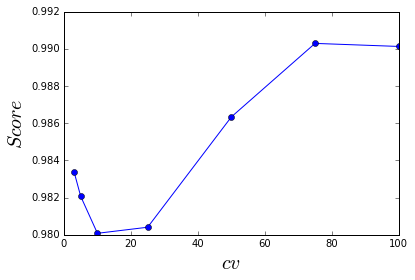

In [60]:
plt.plot(cvs, scores, 'b-o')
plt.xlabel('$cv$', fontsize = 20)
plt.ylabel('$Score$', fontsize = 20)
plt.show()

# 泰坦尼克号数据

In [61]:
#Import the Numpy library
import numpy as np
#Import 'tree' from scikit-learn library
from sklearn import tree

In [64]:
import pandas as pd
train = pd.read_csv('D:/program/cjc2016/data/tatanic_train.csv', sep = ",")

In [65]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train["Age"] = train["Age"].fillna(train["Age"].median())    #如果是NA 放中位数
#Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

#Impute the Embarked variable   上船港口
train["Embarked"] = train["Embarked"].fillna('S')
#Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set 

In [67]:
#Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values    
#列表套列表 等同于[["Pclass"], ["Sex"], ["Age"], ["Fare"]]

#Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()

my_tree_one = my_tree_one.fit(features_one, target)
#Look at the importance of the included features and print the score
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

[ 0.12315342  0.31274009  0.23102611  0.33308037]
0.977553310887


In [70]:
test = pd.read_csv('D:/program/cjc2016/data/tatanic_test.csv', sep = ",")
# Impute the missing value with the median
test.Fare[152] = test.Fare.median()
test["Age"] = test["Age"].fillna(test["Age"].median())
#Convert the male and female groups to integer form
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

#Impute the Embarked variable
test["Embarked"] = test["Embarked"].fillna('S')
#Convert the Embarked classes to integer form
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass","Sex", "Age", "Fare"]].values

# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test['PassengerId']).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Program Files\Anaconda\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set 

In [71]:
print my_solution[:3]

     Survived
892         0
893         0
894         1


In [72]:
# Check that your data frame has 418 entries
print my_solution.shape

(418, 1)


In [74]:
# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("D:/program/cjc2016/homework/techwindge/homework3/tatanic_solution_one.csv", index_label = ["PassengerId"])

In [75]:
# Create a new array with the added features: features_two
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

#过拟合：比实际情况好的预测结果
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5  #一组的人数至少是5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print(my_tree_two.score(features_two, target))

0.905723905724


In [76]:
# create a new train set with the new variable
train_two = train
train_two['family_size'] = train.SibSp + train.Parch + 1

# Create a new decision tree my_tree_three
features_three = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values

my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))

0.979797979798


In [77]:
#Import the `RandomForestClassifier`   随机生零
from sklearn.ensemble import RandomForestClassifier

#We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

#Building the Forest: my_forest
n_estimators = 100
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = n_estimators, random_state = 1)
my_forest = forest.fit(features_forest, target)

#Print the score of the random forest
print(my_forest.score(features_forest, target))

#Compute predictions and print the length of the prediction vector:test_features, pred_forest
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
print(len(test_features))
print(pred_forest[:3])

0.939393939394
418
[0 0 0]


In [78]:
#Request and print the `.feature_importances_` attribute   
print(my_tree_two.feature_importances_)
print(my_forest.feature_importances_)

#Compute and print the mean accuracy score for both models  随机生零的算法好些
print(my_tree_two.score(features_two, target))
print(my_forest.score(features_two, target))

[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]
[ 0.10384741  0.20139027  0.31989322  0.24602858  0.05272693  0.04159232
  0.03452128]
0.905723905724
0.939393939394
